In [2]:
!pip install ppscore
!pip install yellowbrick

     |████████████████████████████████| 51kB 2.4MB/s 
  Created wheel for ppscore: filename=ppscore-1.0.0-py2.py3-none-any.whl size=12427 sha256=40ab7a3963d003d4ff36df1245685e1505b9932340584a0567606166c01883e7
  Stored in directory: /root/.cache/pip/wheels/20/50/9c/eb129e849166531526f18d596da06b45eb5077e5edb406eeba
Successfully built ppscore


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ppscore as pps
import scipy.stats as stats
from yellowbrick.features import Rank1D, Rank2D
from yellowbrick.model_selection import ValidationCurve
from yellowbrick.target import ClassBalance
from yellowbrick.regressor import PredictionError
import warnings
warnings.simplefilter("ignore")
pd.set_option('display.max_columns', 500)
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.feature_selection import RFE
from sklearn.preprocessing import QuantileTransformer, PowerTransformer
from xgboost import XGBRegressor

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Kaggle/house_prices/train.csv')
test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Kaggle/house_prices/test.csv')

In [ ]:
print(train.shape, test.shape)

(1460, 81) (1459, 80)


In [ ]:
#target definition
y = train['SalePrice']

In [ ]:
#target drop
train.drop('SalePrice', axis=1, inplace=True)

In [ ]:
#definition of Id before merge
train_Id = train.Id.values[-1]
test_Id = test.Id

In [ ]:
#merge data
data = pd.concat([train, test])
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [ ]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2917.000000,2917.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2760.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,560.772104,1051.777587,1159.581706,336.483727,4.694416,1500.759849,0.429894,0.061364,1.568003,0.380267,2.860226,1.044536,6.451524,0.597122,1978.113406,1.766621,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,439.543659,440.766258,392.362079,428.701456,46.396825,506.051045,0.524736,0.245687,0.552969,0.502872,0.822693,0.214462,1.569379,0.646129,25.574285,0.761624,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,220.000000,793.000000,876.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,467.000000,989.500000,1082.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,805.500000,1302.000000,1387.500000,704.000000,0.000000,1743.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [ ]:
#aux df with features characteristics
aux = pd.DataFrame(index=data.columns, data={'type': data.dtypes,
                                             'uniques': data.nunique(),
                                             'nulls': data.isnull().sum(),
                                             'nulls %': (data.isnull().sum() / len(data)) * 100})
aux

,type,uniques,nulls,nulls %
Id,int64,2919,0,0.000000
MSSubClass,int64,16,0,0.000000
MSZoning,object,5,4,0.137033
LotFrontage,float64,128,486,16.649538
LotArea,int64,1951,0,0.000000
...,...,...,...,...
MiscVal,int64,38,0,0.000000
MoSold,int64,12,0,0.000000
YrSold,int64,5,0,0.000000
SaleType,object,9,1,0.034258


In [ ]:
#definition of categorical and numerical features
numeric_vars = list(aux[aux['type'] != 'object'].index)
obj_vars = list(aux[aux['type'] == 'object'].index)

In [ ]:
print('Categorical Features:', len(obj_vars), '\nNumeric Features:', len(numeric_vars))

Categorical Features: 43 
Numeric Features: 37


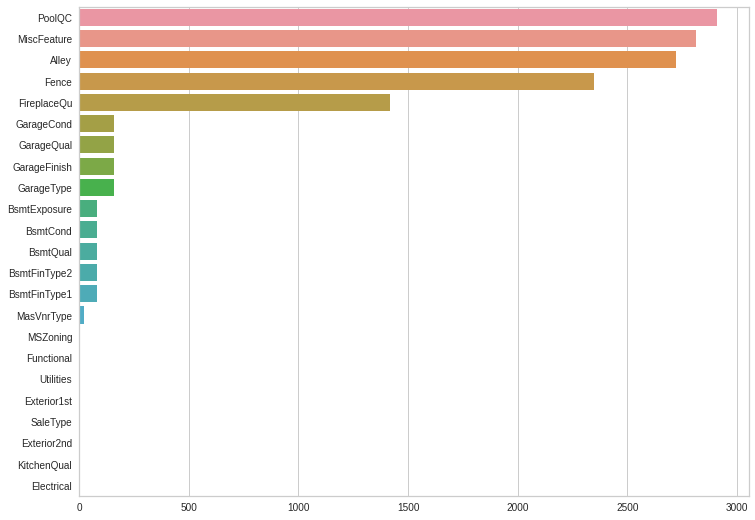

In [ ]:
#categorical null data visualization
plt.figure(figsize=(12, 9))
cat_null_data = data[obj_vars].isnull().sum()
cat_null_data = cat_null_data[cat_null_data.values != 0].sort_values(ascending=False)
sns.barplot(cat_null_data.values, cat_null_data.index)

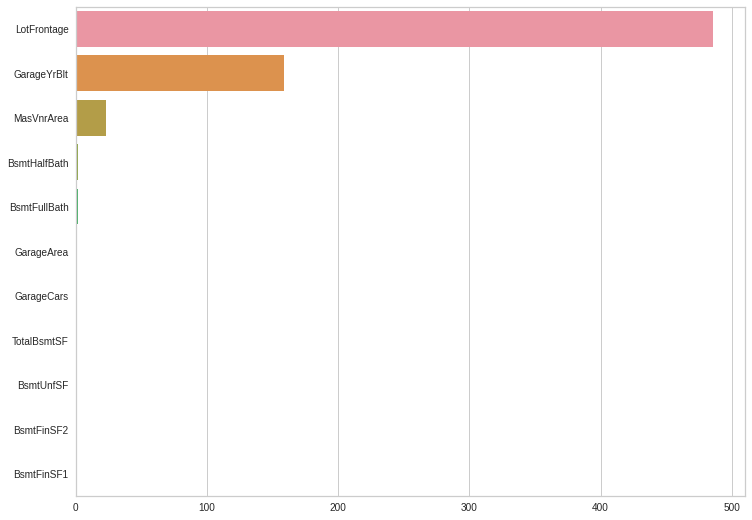

In [ ]:
#numeric null data visualization
plt.figure(figsize=(12, 9))
numeric_null_data = data[numeric_vars].isnull().sum()
numeric_null_data = numeric_null_data[numeric_null_data.values != 0].sort_values(ascending=False)
sns.barplot(numeric_null_data.values, numeric_null_data.index)

In [ ]:
data[numeric_vars].mean()

Id                1460.000000
MSSubClass          57.137718
LotFrontage         69.305795
LotArea          10168.114080
OverallQual          6.089072
OverallCond          5.564577
YearBuilt         1971.312778
YearRemodAdd      1984.264474
MasVnrArea         102.201312
BsmtFinSF1         441.423235
BsmtFinSF2          49.582248
BsmtUnfSF          560.772104
TotalBsmtSF       1051.777587
1stFlrSF          1159.581706
2ndFlrSF           336.483727
LowQualFinSF         4.694416
GrLivArea         1500.759849
BsmtFullBath         0.429894
BsmtHalfBath         0.061364
FullBath             1.568003
HalfBath             0.380267
BedroomAbvGr         2.860226
KitchenAbvGr         1.044536
TotRmsAbvGrd         6.451524
Fireplaces           0.597122
GarageYrBlt       1978.113406
GarageCars           1.766621
GarageArea         472.874572
WoodDeckSF          93.709832
OpenPorchSF         47.486811
EnclosedPorch       23.098321
3SsnPorch            2.602261
ScreenPorch         16.062350
PoolArea  

In [ ]:
#fill nan with 0 on numerics, 'NA' on categorical 
data['GarageYrBlt'].fillna(data['GarageYrBlt'].median(), inplace=True)
data['LotFrontage'].fillna(data['LotFrontage'].mean(), inplace=True)
data[numeric_vars] = data[numeric_vars].fillna(0)
data[obj_vars] = data[obj_vars].fillna('NA')

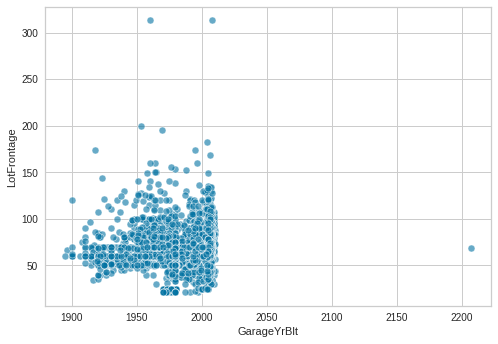

In [ ]:
#outliers and visualization
sns.scatterplot('GarageYrBlt', 'LotFrontage', data=data, alpha=0.6)

In [ ]:
# Garage year outliar
data[data['GarageYrBlt'] >= 2200]['GarageYrBlt']
data['GarageYrBlt'] = data['GarageYrBlt'].replace(2207, 2007)

In [ ]:
#LotFrontage outliars
data[data['LotFrontage'] >= 300]
data['LotFrontage'] = data['LotFrontage'].replace([range(250, 500)], 200)

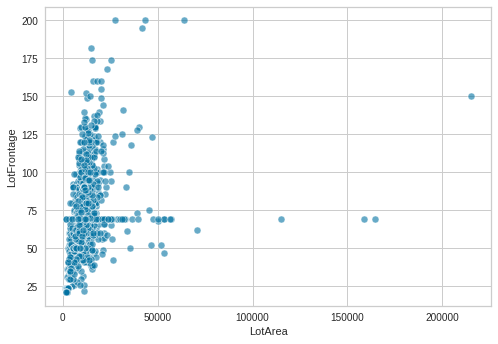

In [ ]:
sns.scatterplot('LotArea', 'LotFrontage', data=data, alpha=0.6)

In [ ]:
#LotFrontage outliars
data[data['LotArea'] >= 100000]['LotArea']
data['LotArea'] = data['LotArea'].replace([range(100000, 200000)], 50000)
data['LotArea'] = data['LotArea'].replace([range(200000, 300000)], 70000)

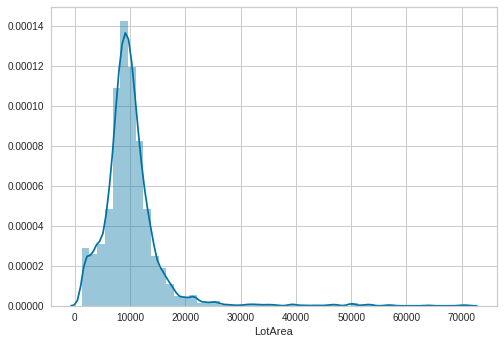

In [ ]:
sns.distplot(data['LotArea'])

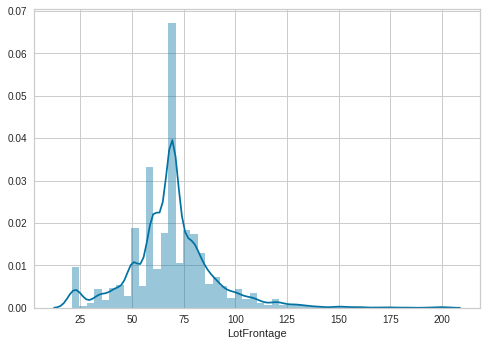

In [ ]:
sns.distplot(data['LotFrontage'])

In [ ]:
#change obj to category
data[obj_vars] = data[obj_vars].astype('category')

In [ ]:
#train and test split
train = data[data.Id <= 1460]
test = data[data.Id > 1460]

In [ ]:
#defining transformers
quantile_trans = QuantileTransformer(output_distribution='uniform')
power_ye = PowerTransformer(method='yeo-johnson')

In [ ]:
#quantile transform
quantile_df = quantile_trans.fit_transform(train[numeric_vars])
train[numeric_vars] = quantile_df

In [ ]:
#quantile test transform
quantile_df = quantile_trans.transform(test[numeric_vars])
test[numeric_vars] = quantile_df

In [ ]:
train['SalePrice'] = y

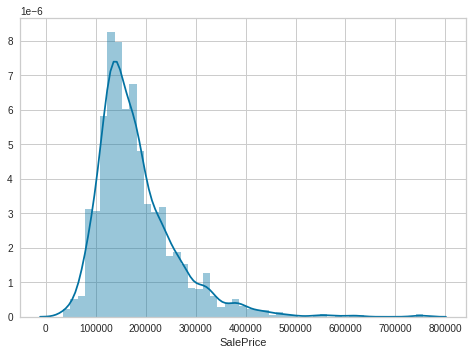

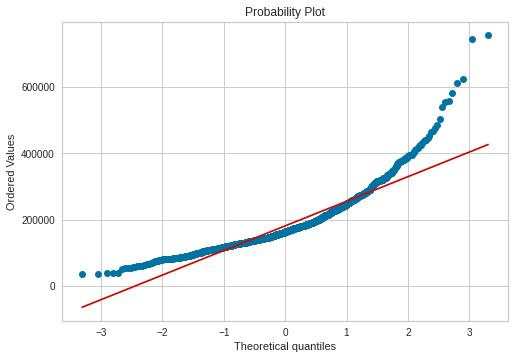

In [ ]:
#target analisys
sns.distplot(train['SalePrice'])
plt.show()
stats.probplot(train['SalePrice'], plot=plt)
plt.show()

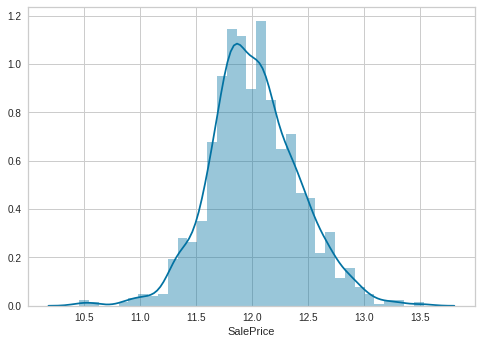

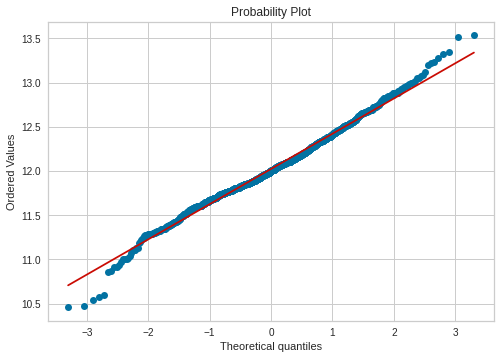

In [ ]:
#log transform target
train['SalePrice'] = np.log(train['SalePrice'])
sns.distplot(train['SalePrice'])
plt.show()
stats.probplot(train['SalePrice'], plot=plt)
plt.show()

Text(0.5, 1.0, 'PPS Feature Score')

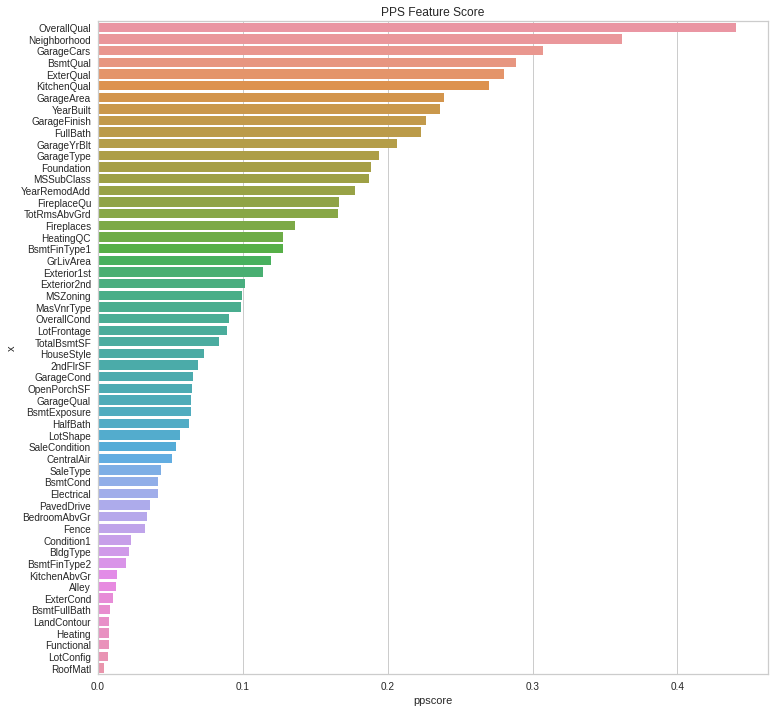

In [ ]:
#ppscore best predictors
plt.figure(figsize=(12, 12))
pps_predictors = pps.predictors(train, y='SalePrice')
pps_predictors_zero = list(pps_predictors[pps_predictors['ppscore'] == 0]['x'].values)
pps_predictors_non_zero = pps_predictors[pps_predictors['ppscore'] != 0]
sns.barplot('ppscore', 'x', data=pps_predictors_non_zero).set_title('PPS Feature Score')

In [ ]:
X = train.drop('SalePrice', axis=1)
y = train.SalePrice

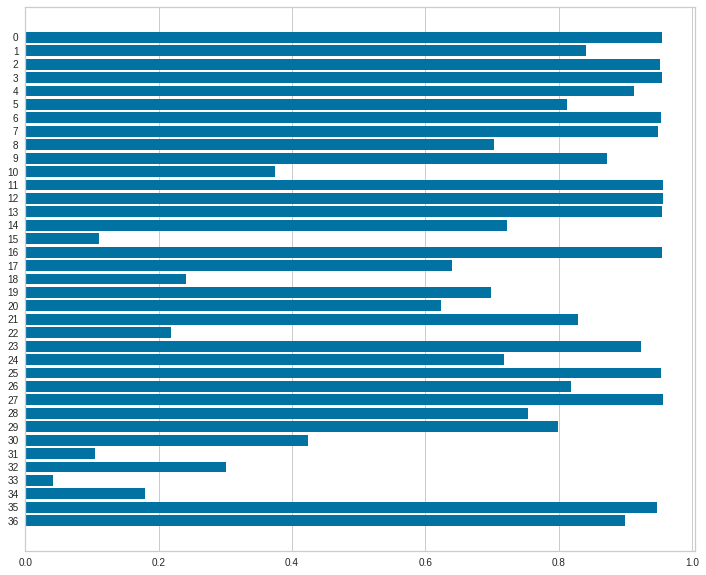

In [ ]:
#yellowbrick vizualization - rank 1D
plt.figure(figsize=(12, 10))
visualizer = Rank1D(algorithm='shapiro')
visualizer.fit(X[numeric_vars].values, y)
plot = visualizer.transform(X[numeric_vars].values)

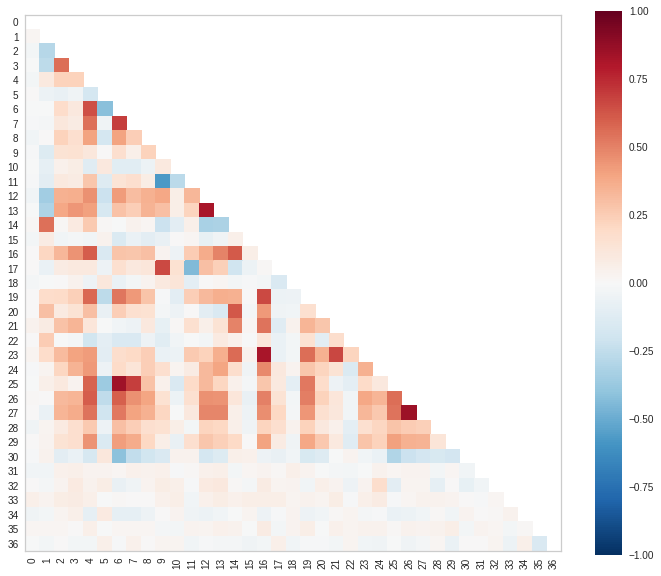

In [ ]:
#yellowbrick vizualization - rank 2D
plt.figure(figsize=(12, 10))
visualizer = Rank2D(algorithm='pearson')
visualizer.fit(X[numeric_vars].values, y)
plot = visualizer.transform(X[numeric_vars].values)

In [ ]:
#drop useless columns
train.drop(pps_predictors_zero, axis=1, inplace=True)
test.drop(pps_predictors_zero, axis=1, inplace=True)

In [ ]:
print('Train shape', train.shape,'\nTest shape:', test.shape)

Train shape (1460, 57) 
Test shape: (1459, 56)


Text(0.5, 1.0, 'Pearson Correlation')

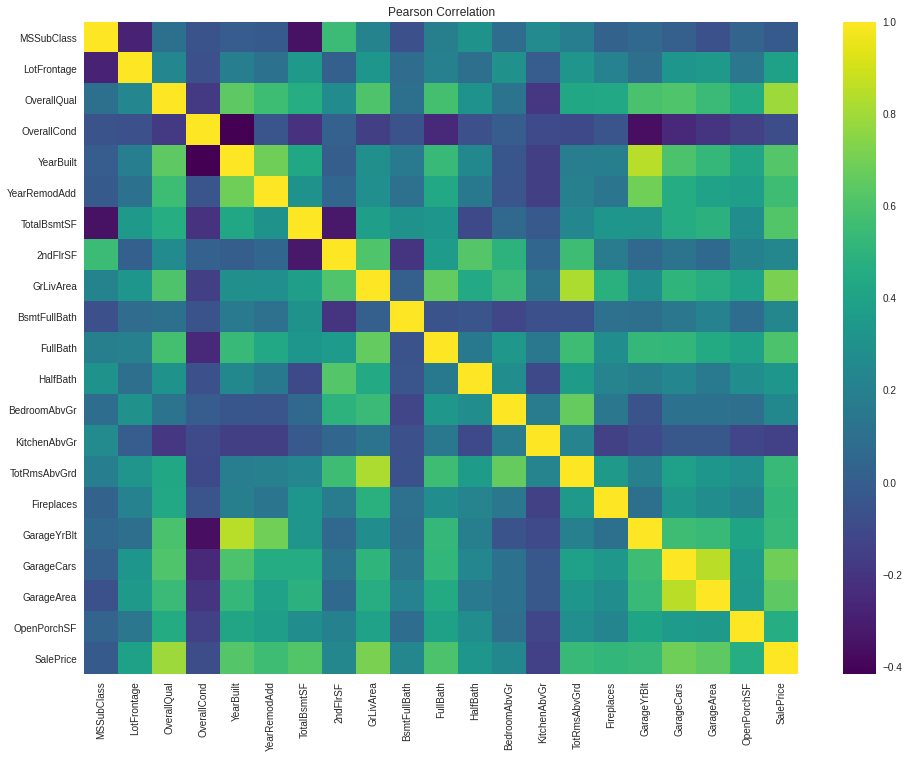

In [ ]:
#heatmaps - pearson
plt.figure(figsize=(16, 12))
corr_pearson = train.corr(method='pearson')
sns.heatmap(corr_pearson, cmap='viridis').set_title('Pearson Correlation')

Text(0.5, 1.0, 'Spearman Correlation')

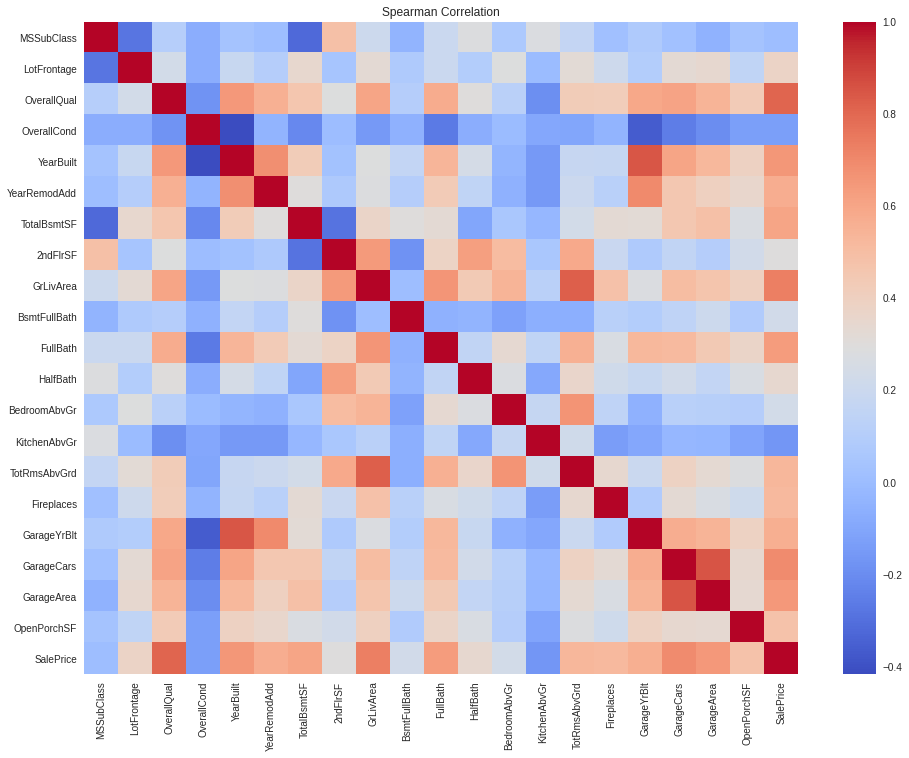

In [ ]:
#heatmaps - spearman
plt.figure(figsize=(16, 12))
corr_pearson = train.corr(method='spearman')
sns.heatmap(corr_pearson, cmap='coolwarm').set_title('Spearman Correlation')

In [ ]:
#heatmap - ppscore
plt.figure(figsize=(16, 10))
non_zero_pps_features = list(pps_predictors[pps_predictors['ppscore'] != 0]['x'].values)
pps_matrix = pps.matrix(train[non_zero_pps_features])

<Figure size 1152x720 with 0 Axes>

In [ ]:
train = pd.get_dummies(train, drop_first=True)
test = pd.get_dummies(test, drop_first=True)

In [ ]:
#defining Regressors
linreg = LinearRegression()
lasso = Lasso()
rfr = RandomForestRegressor()
grad_boost = GradientBoostingRegressor()
mlp = MLPRegressor(256)
xgboost = XGBRegressor()
knn = KNeighborsRegressor()
svm = SVR()

In [ ]:
X = train.drop('SalePrice', axis=1)
y = train.SalePrice

In [ ]:
def model_error(model, X, y):
    kfold = KFold(n_splits=5, shuffle=True)
    score = cross_val_score(model, X, y, scoring='neg_root_mean_squared_error', cv=kfold)
    return round(-np.mean(score), 4)

In [ ]:
print('Root Mean Squared Errors')
print('\nLinear Regression: ', model_error(linreg, X, y))
print('\nLasso: ', model_error(lasso, X, y))
print('\nRandom Forest: ', model_error(rfr, X, y))
print('\nGradient Boosting: ', model_error(grad_boost, X, y))
print('\nMLP: ', model_error(mlp, X, y))
print('XGBoost: ', model_error(xgboost, X, y))
print('\nSVM: ', model_error(svm, X, y))
print('\nKNN: ', model_error(knn, X, y))

Root Mean Squared Errors

Linear Regression:  11021825545.0226

Lasso:  0.3991

Random Forest:  0.1435

Gradient Boosting:  0.1333

MLP:  0.2749
[00:03:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:03:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:03:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:03:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:03:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBoost:  0.1317

SVM:  0.1359

KNN:  0.1866


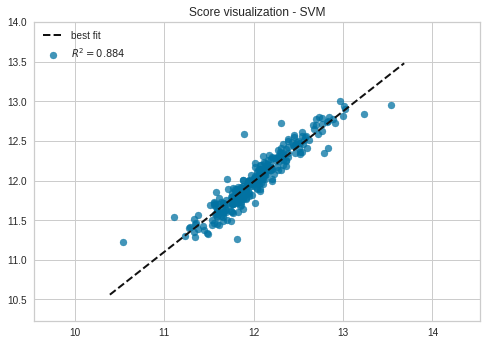

In [ ]:
#score visualization - SVM
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)
visualizer = PredictionError(svm)
visualizer.fit(X_train, y_train)
visualizer.score(X_valid, y_valid)
plt.title('Score visualization - SVM')
plt.legend()

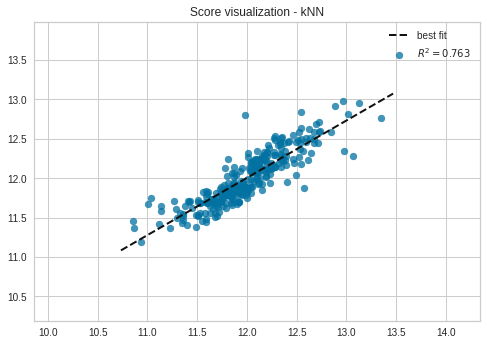

In [ ]:
#score visualization - KNN
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)
visualizer = PredictionError(knn)
visualizer.fit(X_train, y_train)
visualizer.score(X_valid, y_valid)
plt.title('Score visualization - kNN')
plt.legend()

[00:03:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


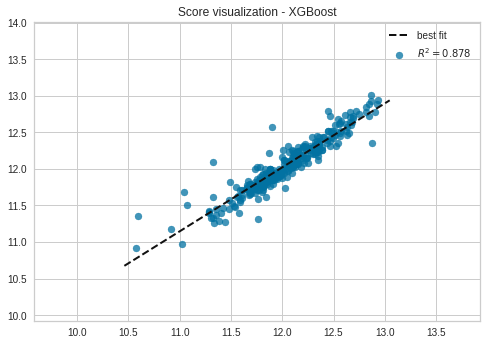

In [ ]:
#score visualization - XGBoost
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)
visualizer = PredictionError(xgboost)
visualizer.fit(X_train, y_train)
visualizer.score(X_valid, y_valid)
plt.title('Score visualization - XGBoost')
plt.legend()

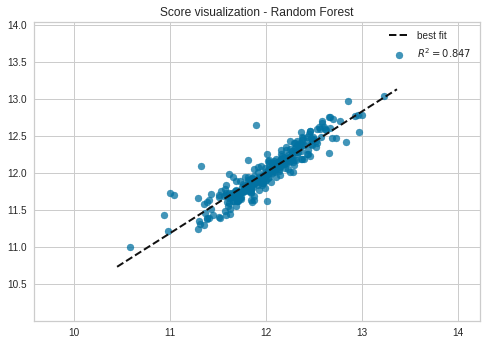

In [ ]:
#score visualization - Random Forest
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)
visualizer = PredictionError(rfr)
visualizer.fit(X_train, y_train)
visualizer.score(X_valid, y_valid)
plt.title('Score visualization - Random Forest')
plt.legend()

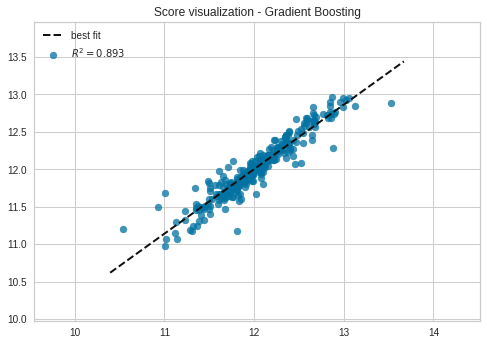

In [ ]:
#score visualization - Gradient Boosting
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)
visualizer = PredictionError(grad_boost)
visualizer.fit(X_train, y_train)
visualizer.score(X_valid, y_valid)
plt.title('Score visualization - Gradient Boosting')
plt.legend()

In [ ]:
#Predict with XGBoost
xgboost.fit(X, y)
pred_xgb = xgboost.predict(test)
pred_xgb = np.exp(pred_xgb)
sub_xgb = pd.DataFrame({'Id': test_Id, 'SalePrice': pred_xgb})
sub_xgb.to_csv('xgb_sub.csv', index=False)

[00:41:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
knn.fit(X, y)
pred_knn = knn.predict(test)
pred_knn = np.exp(pred_knn)
sub_knn = pd.DataFrame({'Id': test_Id, 'SalePrice': pred_knn})
sub_knn.to_csv('knn_sub.csv', index=False)

In [ ]:
svm.fit(X, y)
pred_svm = svm.predict(test)
pred_svm = np.exp(pred_svm)
sub_svm = pd.DataFrame({'Id': test_Id, 'SalePrice': pred_svm})
sub_svm.to_csv('svm_sub.csv', index=False)